In [23]:
#                                                     بسم الله الرحمن الرحيم                                                 
#  program: KickStart.cpp 
#  Description: Student Performance Insights Challenge DEPI X EYOUTH
#  Author:  Abdallah Gasem
#  Contact: ag.ellsayed@gmail.com   
#  last modified: 24-02-2025
#  Version: 1.0

# **Student Performance and Behaviour Analysis**

#### This notebook aims to analyze student performance data to uncover valuable insights that can contribute to improving academic outcomes. The process involves data cleaning, trend analysis, visualization, and deriving actionable insights to better understand the factors influencing student success.


### <-table of contents to be added here->

In [24]:
# Gearing Up!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)  # show all the columns

studs_data = pd.read_csv(r"E:\DEPI\Technical\DEPI\Eyouth-Challenge\Student-Performance-Analysis\Dataset\Students_Grading_Dataset.csv")
studs_df = pd.DataFrame(studs_data)

studs_df  # testing


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,NaN,88.08,2.79,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


## **1. Data Exploration**

<p><b>Metadata</b></p>
<table style="width:45%; float:left; margin-right:5%;">
    <thead>
        <tr>
            <th>Column</th>
            <th>Type</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Student_ID</td>
            <td>String</td>
            <td>Unique identifier for each student</td>
        </tr>
        <tr>
            <td>First_Name</td>
            <td>String</td>
            <td>Student’s first name</td>
        </tr>
        <tr>
            <td>Last_Name</td>
            <td>String</td>
            <td>Student’s last name</td>
        </tr>
        <tr>
            <td>Email</td>
            <td>String</td>
            <td>Contact email (can be anonymized)</td>
        </tr>
        <tr>
            <td>Gender</td>
            <td>Categorical</td>
            <td>Male, Female, Other</td>
        </tr>
        <tr>
            <td>Age</td>
            <td>Integer</td>
            <td>Age of the student</td>
        </tr>
        <tr>
            <td>Department</td>
            <td>String</td>
            <td>Student's department (e.g., CS, Engineering, Business)</td>
        </tr>
        <tr>
            <td>Attendance (%)</td>
            <td>Float</td>
            <td>Attendance percentage (0-100%)</td>
        </tr>
        <tr>
            <td>Midterm_Score</td>
            <td>Float</td>
            <td>Midterm exam score (out of 100)</td>
        </tr>
        <tr>
            <td>Final_Score</td>
            <td>Float</td>
            <td>Final exam score (out of 100)</td>
        </tr>
        <tr>
            <td>Assignments_Avg</td>
            <td>Float</td>
            <td>Average score of all assignments (out of 100)</td>
        </tr>
        <tr>
            <td>Quizzes_Avg</td>
            <td>Float</td>
            <td>Average quiz scores (out of 100)</td>
        </tr>
    </tbody>
</table>

<table style="width:45%; float:left;">
    <thead>
        <tr>
            <th>Column</th>
            <th>Type</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Participation_Score</td>
            <td>Float</td>
            <td>Score based on class participation (0-10)</td>
        </tr>
        <tr>
            <td>Projects_Score</td>
            <td>Float</td>
            <td>Project evaluation score (out of 100)</td>
        </tr>
        <tr>
            <td>Total_Score</td>
            <td>Float</td>
            <td>Weighted sum of all grades</td>
        </tr>
        <tr>
            <td>Grade</td>
            <td>Categorical</td>
            <td>Letter grade (A, B, C, D, F)</td>
        </tr>
        <tr>
            <td>Study_Hours_per_Week</td>
            <td>Float</td>
            <td>Average study hours per week</td>
        </tr>
        <tr>
            <td>Extracurricular_Activities</td>
            <td>Boolean</td>
            <td>Whether the student participates in extracurriculars (Yes/No)</td>
        </tr>
        <tr>
            <td>Internet_Access_at_Home</td>
            <td>Boolean</td>
            <td>Does the student have access to the internet at home? (Yes/No)</td>
        </tr>
        <tr>
            <td>Parent_Education_Level</td>
            <td>Categorical</td>
            <td>Highest education level of parents (None, High School, Bachelor's, Master's, PhD)</td>
        </tr>
        <tr>
            <td>Family_Income_Level</td>
            <td>Categorical</td>
            <td>Low, Medium, High</td>
        </tr>
        <tr>
            <td>Stress_Level (1-10)</td>
            <td>Integer</td>
            <td>Self-reported stress level (1: Low, 10: High)</td>
        </tr>
        <tr>
            <td>Sleep_Hours_per_Night</td>
            <td>Float</td>
            <td>Average hours of sleep per night</td>
        </tr>
    </tbody>
</table>


##### 📌 **Initial Observation:** At first glance, the Email & Student Id columns does not contribute to the analysis and can be considered for removal in the data cleaning phase. Additionally, the First_Name and Last_Name columns could be combined into a single Name column to reduce redundancy

In [25]:
studs_df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

### **1.1 General Feel**

In [26]:
studs_df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [27]:
studs_df.describe(include="all")

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000,5000,5000,5000,5000,5000.000000,5000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000,5000,3206,5000,5000.00000,5000.000000
unique,5000,8,6,5000,2,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,2,2,4,3,NaN,NaN
top,S1000,Maria,Johnson,student0@university.com,Male,NaN,CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,No,Yes,PhD,Low,NaN,NaN
freq,1,657,868,1,2551,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1495,NaN,3493,4485,820,1983,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,21.048400,NaN,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,NaN,17.658860,NaN,NaN,NaN,NaN,5.48080,6.488140
std,NaN,NaN,NaN,NaN,NaN,1.989786,NaN,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,NaN,7.275864,NaN,NaN,NaN,NaN,2.86155,1.452283
min,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,NaN,5.000000,NaN,NaN,NaN,NaN,1.00000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,NaN,11.400000,NaN,NaN,NaN,NaN,3.00000,5.200000
50%,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,NaN,17.500000,NaN,NaN,NaN,NaN,5.00000,6.500000
75%,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,NaN,24.100000,NaN,NaN,NaN,NaN,8.00000,7.700000


### **1.2 Identfying Missing values & Duplicates**

#### **1.2.1 Missing Values**

##### 📌 **Initial Observation:** the Attendance (%) column got 516 (10.32%) missing values , the Assignments_Avg column got 517 (10.34%) missing values and Parent_Education_Level got 1794 (35.88%) missing values! which raise the following questions

- Is there a pattern in the missing values?
- Are the missing values concentrated in a specific grade level, school, or demographic group?
- Why might these data be missing?
- Should missing data points be imputed, or does it indicate an important trend?
- Does missing attendance correlate with lower academic performance or other factors?
- Should we assume zero attendance for missing values, or is a different approach needed?
- in case of Parent_Education_Level Should we introduce a category like "Unknown" or "Not Reported"?
- is the missing values for Attendence (%) and Assignments_Avg belong to the same students? 
- are these missing values across all the three columns intersect? or distinct?

Note: The high percentage of missing values in case of Parent_Education_Level suggests that this information may be optional or sensitive. Further analysis is needed!

In [28]:
studs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [29]:
print(studs_df.isna().sum())
print(studs_df.shape)

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64
(5000, 23)


In [30]:
# the percentage of missing values for each feature
(studs_df.isna().sum() / 5000) * 100

Student_ID                     0.00
First_Name                     0.00
Last_Name                      0.00
Email                          0.00
Gender                         0.00
Age                            0.00
Department                     0.00
Attendance (%)                10.32
Midterm_Score                  0.00
Final_Score                    0.00
Assignments_Avg               10.34
Quizzes_Avg                    0.00
Participation_Score            0.00
Projects_Score                 0.00
Total_Score                    0.00
Grade                          0.00
Study_Hours_per_Week           0.00
Extracurricular_Activities     0.00
Internet_Access_at_Home        0.00
Parent_Education_Level        35.88
Family_Income_Level            0.00
Stress_Level (1-10)            0.00
Sleep_Hours_per_Night          0.00
dtype: float64

In [31]:
# Convert categorical column to numeric
studs_df['Parent_Education_Level'] = studs_df['Parent_Education_Level'].astype('category').cat.codes

# Calculate correlation
studs_df[["Attendance (%)", "Assignments_Avg", "Parent_Education_Level"]].corr()

,Attendance (%),Assignments_Avg,Parent_Education_Level
Attendance (%),1.000000,-0.037872,0.007049
Assignments_Avg,-0.037872,1.000000,0.037644
Parent_Education_Level,0.007049,0.037644,1.000000


#### **1.2.2 Duplicates**

##### 📌 **Initial Observation:** zero duplicate rows in the dataset

In [32]:
studs_df.duplicated().sum()

np.int64(0)

### **1.3 Data Distrbution**

#### **1.3.1 Numerical Data**

##### 📌 **Initial Observation:** observed that the data is well distributed within its minimum and maximum values, suggesting a natural spread without extreme deviations. While this indicates a lower likelihood of significant outliers, further statistical analysis (e.g., box plots or z-scores) will help confirm their presence

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attendance (%)'}>,
        <Axes: title={'center': 'Midterm_Score'}>],
       [<Axes: title={'center': 'Final_Score'}>,
        <Axes: title={'center': 'Assignments_Avg'}>,
        <Axes: title={'center': 'Quizzes_Avg'}>],
       [<Axes: title={'center': 'Participation_Score'}>,
        <Axes: title={'center': 'Projects_Score'}>,
        <Axes: title={'center': 'Total_Score'}>]], dtype=object)

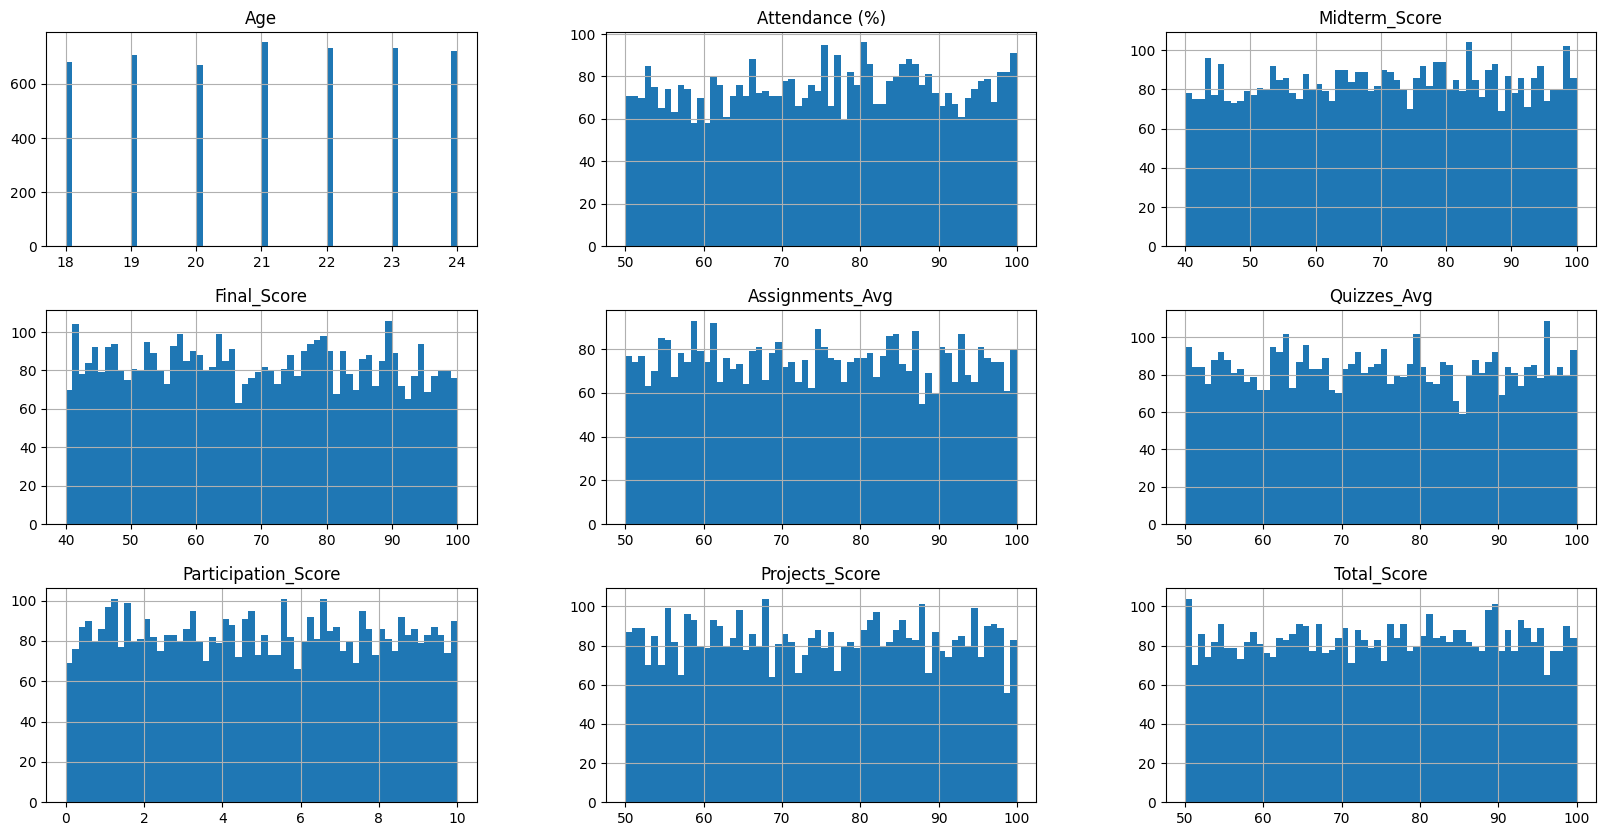

In [33]:
# Numericals Distrbutions
studs_df_nums = studs_df.loc[:,['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score']]

studs_df_nums.hist(bins=60, figsize=(20,10))

##### 📌 **Initial Observation:** student-reported stress levels reveals that 59.3% of students selected a stress level between 5 and 10, indicating that a majority experience moderate to high stress. This suggests that stress management may be a key factor influencing student performance and well-being

Stress_Level (1-10)
1     489
2     504
3     509
4     533
5     495
6     481
7     489
8     524
9     488
10    488
Name: count, dtype: int64


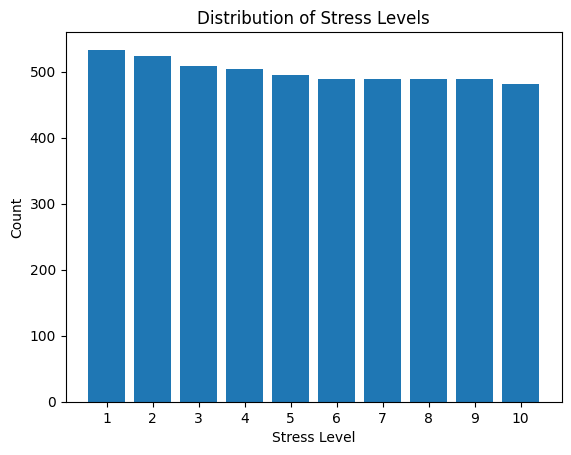

In [34]:
# other features 
print(studs_df["Stress_Level (1-10)"].value_counts().sort_index())

stress_lvl = [1,2,3,4,5,6,7,8,9,10]

plt.bar(stress_lvl, studs_df["Stress_Level (1-10)"].value_counts(), tick_label=stress_lvl)
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Distribution of Stress Levels')
plt.show()

#### **1.3.2 Categorical Data**

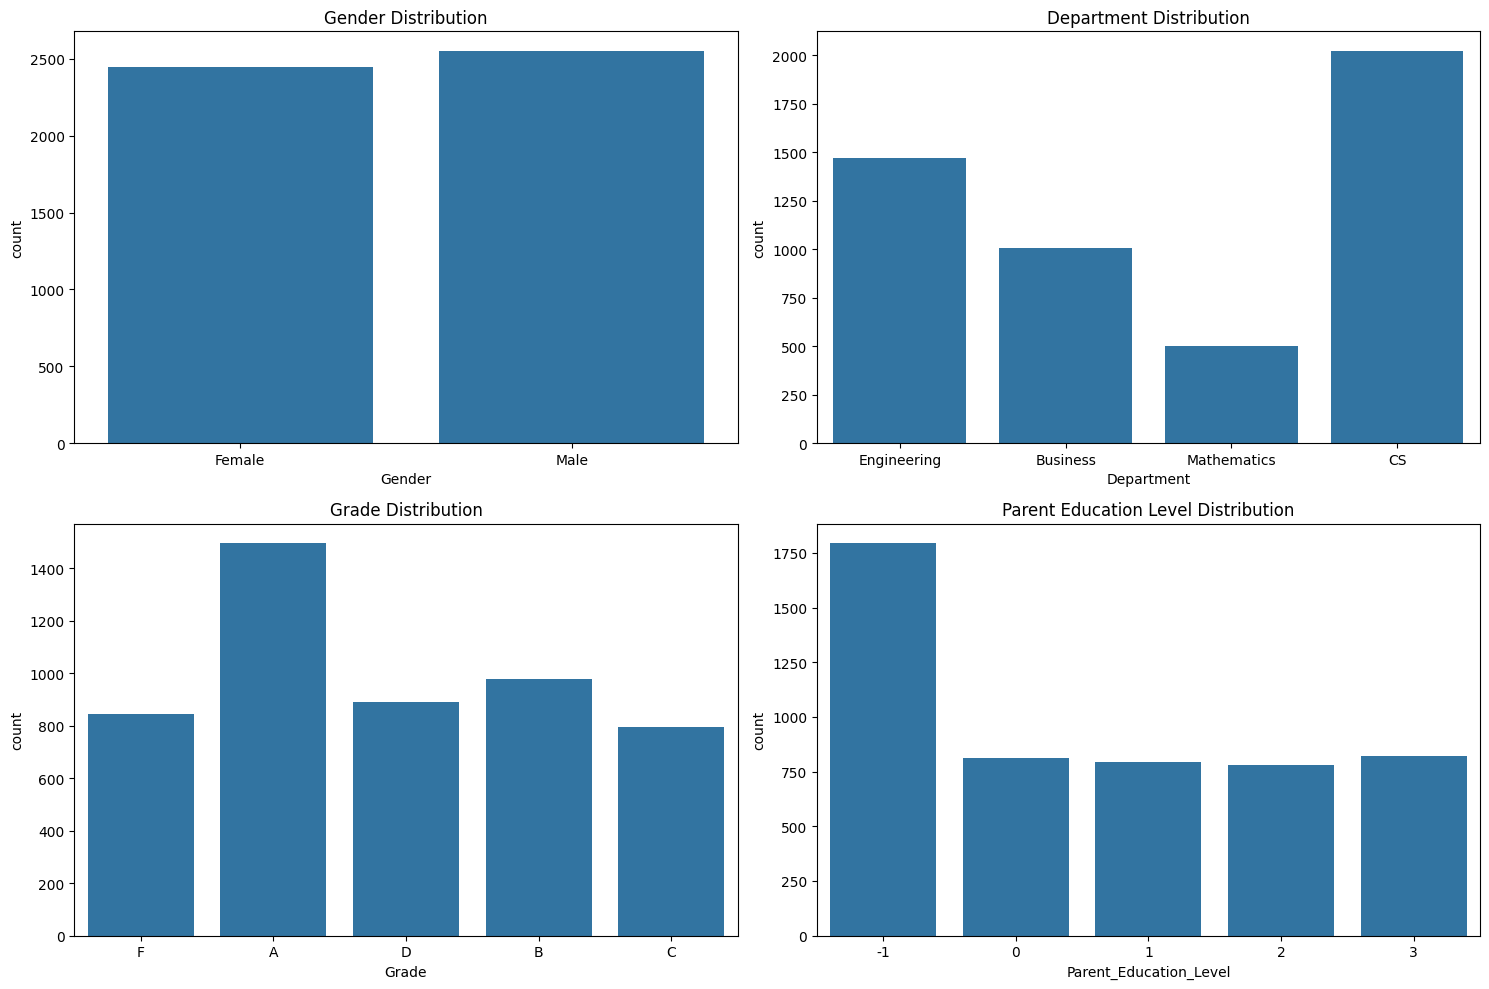

In [35]:
# Categorical Data
studs_df_cats = studs_df.loc[:,['Gender', 
       'Department','Grade', 'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level']]

# Plotting categorical data using bar plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(ax=axes[0, 0], x='Gender', data=studs_df_cats)
axes[0, 0].set_title('Gender Distribution')

sns.countplot(ax=axes[0, 1], x='Department', data=studs_df_cats)
axes[0, 1].set_title('Department Distribution')

sns.countplot(ax=axes[1, 0], x='Grade', data=studs_df_cats)
axes[1, 0].set_title('Grade Distribution')

sns.countplot(ax=axes[1, 1], x='Parent_Education_Level', data=studs_df_cats)
axes[1, 1].set_title('Parent Education Level Distribution')

plt.tight_layout()
plt.show()

#### **1.3.3 Boolean Data**

In [36]:
studs_df_bools = studs_df[["Extracurricular_Activities", "Internet_Access_at_Home"]]
studs_df_bools.apply(pd.Series.value_counts)

,Extracurricular_Activities,Internet_Access_at_Home
No,3493,515
Yes,1507,4485


## **2. Data Cleaning**